# Лабораторная работа №9 - Тактическое планирование эксперимента

Каждое задание предполагает разработку программной имитационной модели случайного блуждания, с помощью которой могут быть получены необходимые результаты по двум частям лабораторной работы.

В первой части работы выполняется планирование и получение результатов эксперимента по оценке среднего значения указанного параметра.

Во второй части выполняется планирование и получение результатов эксперимента для оценки с заданной точностью выборочной диспесии указанного параметра.

В процессе проведения пробного распределения при планировании строится статистическое распределение исследуемого параметра и определяется целесообразность аппроксимации этого распределения нормальным законом. В зависимости от этого выбирается подход для определения набора эксперимента.

#### Пчелы на квадратной решетке. «Рой» из $N$ «пчёл» изначально расположен в единичном круге с центром в начале координат. На каждом шаге по времени каждая пчела движется случайным образом равновероятно в одном из четырех направлений: на север, юг, восток и запад. Определите расстояние, на которое удаляется отдельная пчела за $M = 8$ шагов. В течение каждого временного интервала каждая пчела делает шаг единичной длины. Усреднение выполняется по N пчёлам.

In [1]:
import random
import math

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = [12, 6]
import matplotlib; matplotlib.style.use('ggplot')

In [2]:
n = 1000  # Объем выборки
M = 8     # Количество шагов
k = 8     # Интервалов разбиения
q = 1.96  # Квантиль

## Часть 0 - пробный эксперимент

In [3]:
class RandomWalk:
    def __init__(self, n, M):
        self.n = n
        self.M = M

    def model(self):
        bees = [0 for _ in range(self.n)]
        L = 0

        for i in range(self.n):
            x, y = 0, 0

            for j in range(self.M):
                r = random.random()

                if r < 0.25:
                    x += 1
                elif r < 0.5:
                    x -= 1
                elif r < 0.75:
                    y -= 1
                else:
                    y += 1
            
            bees[i] = math.sqrt(x ** 2 + y ** 2)
            L += math.sqrt(x ** 2 + y ** 2)

        return bees, L / self.n

In [4]:
distribution_list0, L0 = RandomWalk(n, M).model()
sample0 = pd.Series(distribution_list0, name='value')
distribution0 = pd.DataFrame(sample0)
distribution0['cdf'] = distribution0.rank(method='average', pct=True)

### Среднее значение

In [5]:
print(round(L0, 3))

2.544


### Статистическая фукнция распределения

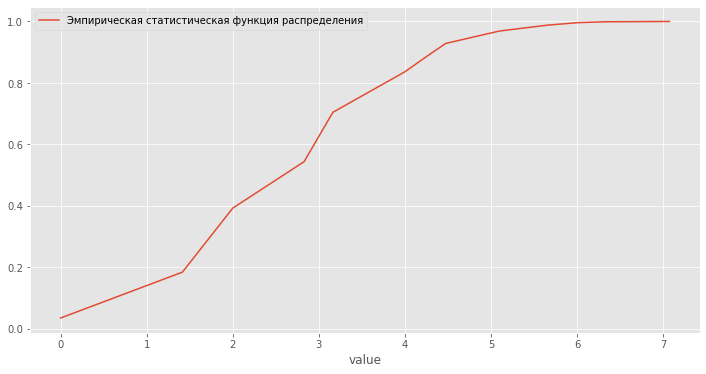

In [6]:
distribution0.sort_values("value").plot(x="value", y="cdf", label="Эмпирическая статистическая функция распределения")
plt.legend(loc="upper left")

### Гистрограмма частот

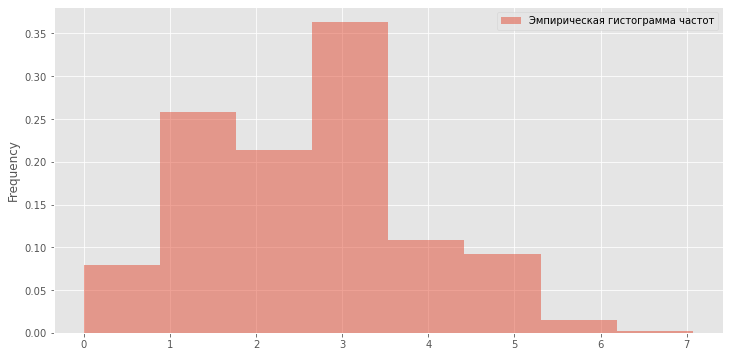

In [7]:
sample0.plot.hist(bins=k, alpha=0.5, density=True, label="Эмпирическая гистограмма частот")
plt.legend(loc="upper right")

### Математическое ожидание и дисперсия

In [8]:
mean0 = np.mean(sample0)
variance0 = np.var(sample0)

print(f"""
Математическое ожидание: M(X) = {round(mean0, 3)}
Дисперсия: D(X) = {round(variance0, 3)}
""")


Математическое ожидание: M(X) = 2.544
Дисперсия: D(X) = 1.692



## Часть 1 - планирование и получение результатов эксперимента по оценке среднего значения указанного параметра

In [9]:
class RandomWalkByAverage:
    def __init__(self, M, q, variance):
        self.M = M
        self.q = q
        self.ref_var = variance
        self.accuracy = 0.1

        self.n = int((self.q ** 2 * self.ref_var) / (self.accuracy ** 2))

        print(f"Количество пчел: {self.n}")

    def model(self):
        bees = [0 for _ in range(self.n)]
        L = 0

        for i in range(self.n):
            x, y = 0, 0

            for j in range(self.M):
                r = random.random()

                if r < 0.25:
                    x += 1
                elif r < 0.5:
                    x -= 1
                elif r < 0.75:
                    y -= 1
                else:
                    y += 1
            
            bees[i] = math.sqrt(x ** 2 + y ** 2)
            L += math.sqrt(x ** 2 + y ** 2)

        return bees, L / self.n

In [10]:
distribution_list1, L1 = RandomWalkByAverage(M, q, variance0).model()
sample1 = pd.Series(distribution_list1, name='value')
distribution1 = pd.DataFrame(sample1)
distribution1['cdf'] = distribution1.rank(method='average', pct=True)

Количество пчел: 650


### Среднее значение

In [11]:
print(round(L1, 3))

2.636


### Статистическая фукнция распределения

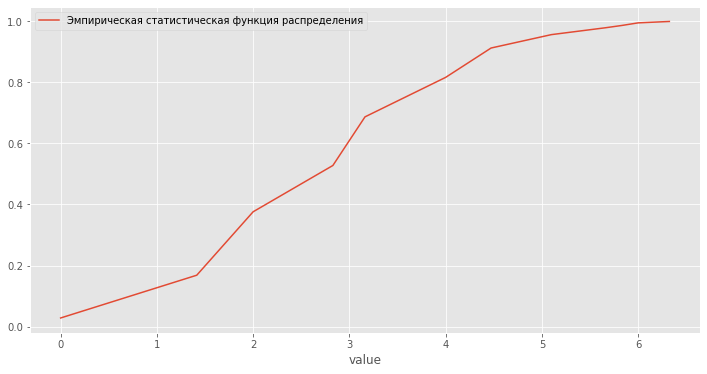

In [12]:
distribution1.sort_values("value").plot(x="value", y="cdf", label="Эмпирическая статистическая функция распределения")
plt.legend(loc="upper left")

### Гистрограмма частот

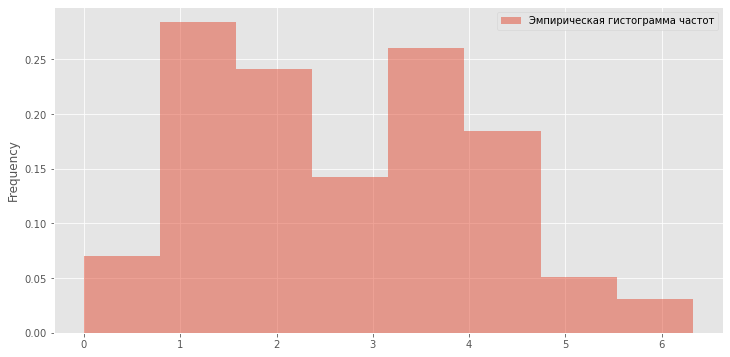

In [13]:
sample1.plot.hist(bins=k, alpha=0.5, density=True, label="Эмпирическая гистограмма частот")
plt.legend(loc="upper right")

### Математическое ожидание и дисперсия

In [14]:
mean1 = np.mean(sample1)
variance1 = np.var(sample1)

print(f"""
Математическое ожидание: M(X) = {round(mean1, 3)}
Дисперсия: D(X) = {round(variance1, 3)}
""")


Математическое ожидание: M(X) = 2.636
Дисперсия: D(X) = 1.742



## Часть 2 - планирование и получение результатов эксперимента для оценки с заданной точностью выборочной диспесии указанного параметра

In [15]:
class RandomWalkByVariance:
    def __init__(self, M, q, variance):
        self.M = M
        self.q = q
        self.ref_var = variance
        self.accuracy = 0.01

        self.n = int(1 + (2 * self.q ** 2) / (self.accuracy / self.ref_var) ** 2)

        print(f"Количество пчел: {self.n}")

    def model(self):
        bees = [0 for _ in range(self.n)]
        L = 0

        for i in range(self.n):
            x, y = 0, 0

            for j in range(self.M):
                r = random.random()

                if r < 0.25:
                    x += 1
                elif r < 0.5:
                    x -= 1
                elif r < 0.75:
                    y -= 1
                else:
                    y += 1
            
            bees[i] = math.sqrt(x ** 2 + y ** 2)
            L += math.sqrt(x ** 2 + y ** 2)

        return bees, L / self.n

In [16]:
distribution_list2, L2 = RandomWalkByVariance(M, q, variance1).model()
sample2 = pd.Series(distribution_list2, name='value')
distribution2 = pd.DataFrame(sample2)
distribution2['cdf'] = distribution2.rank(method='average', pct=True)

Количество пчел: 233155


### Среднее значение

In [17]:
print(round(L2, 3))

2.506


### Статистическая фукнция распределения

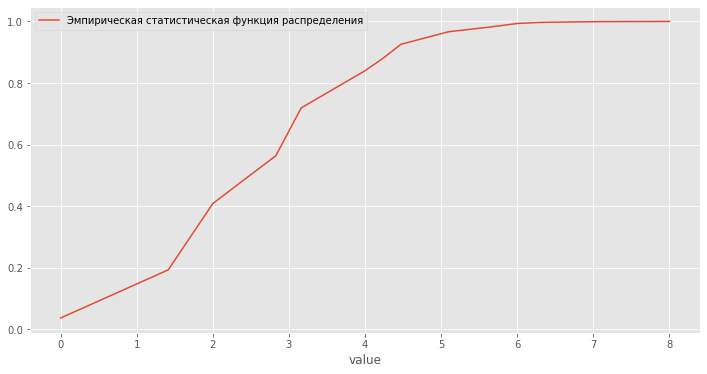

In [18]:
distribution2.sort_values("value").plot(x="value", y="cdf", label="Эмпирическая статистическая функция распределения")
plt.legend(loc="upper left")

### Гистрограмма частот

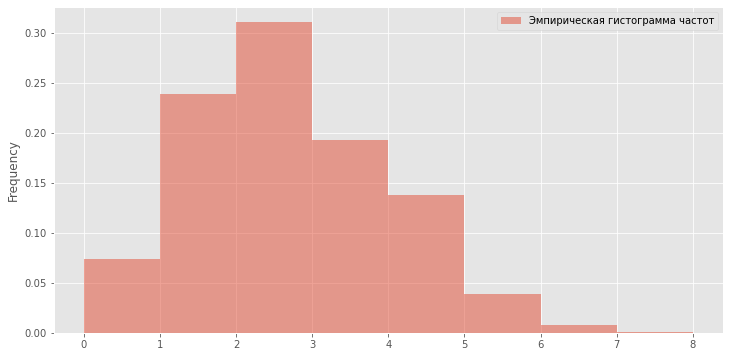

In [19]:
sample2.plot.hist(bins=k, alpha=0.5, density=True, label="Эмпирическая гистограмма частот")
plt.legend(loc="upper right")

### Математическое ожидание и дисперсия

In [20]:
mean2 = np.mean(sample2)
variance2 = np.var(sample2)

print(f"""
Математическое ожидание: M(X) = {round(mean2, 3)}
Дисперсия: D(X) = {round(variance2, 3)}
""")


Математическое ожидание: M(X) = 2.506
Дисперсия: D(X) = 1.741

